## 1. Разделение выбраки методом K-средних

In [32]:
import pandas as pd

source_df = pd.read_csv("Cust_Segmentation.csv")
source_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [33]:
df = source_df.drop('Address', axis = 1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [34]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df.values[:,1:]
print(X)
X = np.nan_to_num(X)
print(X)

[[41.     2.     6.    ...  1.073  0.     6.3  ]
 [47.     1.    26.    ...  8.218  0.    12.8  ]
 [33.     2.    10.    ...  5.802  1.    20.9  ]
 ...
 [25.     4.     0.    ...  3.21   1.    33.4  ]
 [32.     1.    12.    ...  0.696  0.     2.9  ]
 [52.     1.    16.    ...  3.638  0.     8.6  ]]
[[41.     2.     6.    ...  1.073  0.     6.3  ]
 [47.     1.    26.    ...  8.218  0.    12.8  ]
 [33.     2.    10.    ...  5.802  1.    20.9  ]
 ...
 [25.     4.     0.    ...  3.21   1.    33.4  ]
 [32.     1.    12.    ...  0.696  0.     2.9  ]
 [52.     1.    16.    ...  3.638  0.     8.6  ]]


In [35]:
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(n_clusters = clusterNum)
k_means.fit(X) #Compute k-means clustering
labels = k_means.labels_
labels

array([1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [36]:
df['Cluster'] = labels #добавление нового столбца Cluster(показывает результаты кластеризации в таблице)
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8,1
846,847,28,2,7,34,0.359,2.021,0.0,7.0,1
847,848,25,4,0,18,2.802,3.210,1.0,33.4,1
848,849,32,1,12,28,0.116,0.696,0.0,2.9,1


In [37]:
df.groupby('Cluster').mean() #группировка результатов кластеризации в таблице

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster,,,,,,,,,
0,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


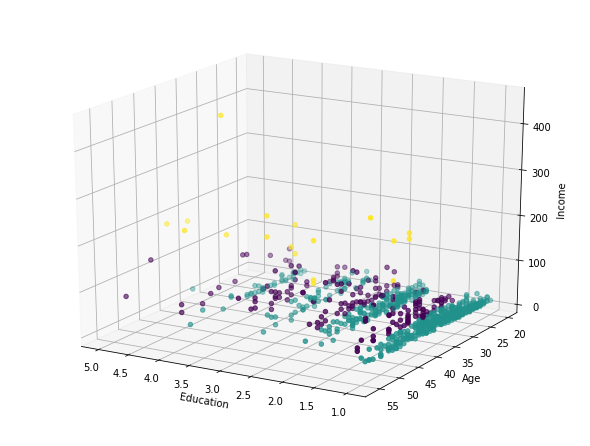

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
figure = plt.figure(1, figsize = (8,6))
ax = Axes3D(figure, rect = [0, 0, 1, 1], elev = 20, azim = 120)

ax.set_xlabel("Education")
ax.set_ylabel("Age")
ax.set_zlabel("Income")
ax.scatter(X[:,1],X[:,0],X[:,3], c = labels.astype(np.float))

## 2. Создание кластеров 15 текстов (3 темы) методом K-средних. 

In [39]:
import nltk
import pandas as pd
from nltk import word_tokenize

In [40]:
import re

filenames = ['chemistry_1.txt', 'chemistry_2.txt', 'chemistry_3.txt', 'chemistry_4.txt', 'chemistry_5.txt',
            'history_1.txt', 'history_2.txt', 'history_3.txt', 'history_4.txt', 'history_5.txt',
            'nature_1.txt', 'nature_2.txt', 'nature_3.txt', 'nature_4.txt', 'nature_5.txt']
l = ["" for i in range(15)]
for i in range(15):
    s = "data/" + filenames[i]
    with open(s) as inf:
        l[i] = inf.read().lower()
        l[i] = re.sub(r"[,\t;:\(\)\.\"«»“”\d\+\?\[\]\']*", r"", l[i])
        l[i] = re.sub(r"[\n]+", r" ", l[i])
for i in range(15):
    print(i, l)        

0 ['the system which began to be called alchemy in the th and th centuries of our era had no special name before that time but was known as the sacred art the divine science the occult science the art of hermes a commentator on aristotle writing in the th century ad calls certain instruments used for fusion and calcination chuika organa that is instruments for melting and pouring hence probably came the adjective chyic or chymic and at a somewhat later time the word chemia as the name of that art which deals with calcinations fusions meltings and the like the writer of a treatise on astrology in the th century speaking of the influences of the stars on the dispositions of man says if a man is born under mercury he will give himself to astronomy if mars he will follow the profession of arms if saturn he will devote himself to the science of alchemy scientia alchemiae the word alchemia which appears in this treatise was formed by prefixing the arabic al meaning the to chemia a word as we

In [41]:
from nltk.corpus import stopwords
from string import punctuation
d = {}
for i in range(15):
    text = word_tokenize(text=l[i])#получение списка всех слов
    result = []
    for word in text:
        if word in stopwords.words("english"): #удаляем шумовые слова английского языка в тексте
            continue
        if word not in result:
            result.append(word)
    d[i] = result

for i in range(15):
    print(d)    

{0: ['system', 'began', 'called', 'alchemy', 'th', 'centuries', 'era', 'special', 'name', 'time', 'known', 'sacred', 'art', 'divine', 'science', 'occult', 'hermes', 'commentator', 'aristotle', 'writing', 'century', 'ad', 'calls', 'certain', 'instruments', 'used', 'fusion', 'calcination', 'chuika', 'organa', 'melting', 'pouring', 'hence', 'probably', 'came', 'adjective', 'chyic', 'chymic', 'somewhat', 'later', 'word', 'chemia', 'deals', 'calcinations', 'fusions', 'meltings', 'like', 'writer', 'treatise', 'astrology', 'speaking', 'influences', 'stars', 'dispositions', 'man', 'says', 'born', 'mercury', 'give', 'astronomy', 'mars', 'follow', 'profession', 'arms', 'saturn', 'devote', 'scientia', 'alchemiae', 'alchemia', 'appears', 'formed', 'prefixing', 'arabic', 'al', 'meaning', 'seen', 'greek', 'origin', 'growth', 'development', 'transformation', 'chemistry', 'consider', 'transforming', 'must', 'necessarily', 'pay', 'much', 'attention', 'working', 'crucibles', 'furnaces', 'alembics', 'ves

In [42]:
list = []

for item in d[14]:
    k = 0
    
    for i in range(14):
        if item in d[i]:
            k += 1
    if k > 5:
        list.append(item)     
print(list)

['seen', 'water', 'work', 'beneath', 'still', 'carried', 'earth', 'us', 'may', 'first', 'either', 'known', 'less', 'held', 'many', 'even', 'much', 'one', 'name', 'given', 'made', 'way', 'found', 'away', 'would', 'formed', 'called', 'several', 'find', 'year', 'means', 'must', 'little', 'often', 'far', 'chemical', 'long', 'could', 'left', 'also', 'used', 'form', 'different', 'rate', 'two', 'slowly', 'great', 'use', 'following', 'thus', 'whose', 'able', 'upon', 'whole', 'necessary', 'natural', 'said', 'last', 'become', 'common', 'since', 'certain', 'together', 'men', 'greater', 'view', 'removed', 'place', 'nature', 'every', 'time']


In [43]:
for i in range(15):
    for item in list:
        if item in d[i]:
            d[i].remove(item)
print(d)

{0: ['system', 'began', 'alchemy', 'th', 'centuries', 'era', 'special', 'sacred', 'art', 'divine', 'science', 'occult', 'hermes', 'commentator', 'aristotle', 'writing', 'century', 'ad', 'calls', 'instruments', 'fusion', 'calcination', 'chuika', 'organa', 'melting', 'pouring', 'hence', 'probably', 'came', 'adjective', 'chyic', 'chymic', 'somewhat', 'later', 'word', 'chemia', 'deals', 'calcinations', 'fusions', 'meltings', 'like', 'writer', 'treatise', 'astrology', 'speaking', 'influences', 'stars', 'dispositions', 'man', 'says', 'born', 'mercury', 'give', 'astronomy', 'mars', 'follow', 'profession', 'arms', 'saturn', 'devote', 'scientia', 'alchemiae', 'alchemia', 'appears', 'prefixing', 'arabic', 'al', 'meaning', 'greek', 'origin', 'growth', 'development', 'transformation', 'chemistry', 'consider', 'transforming', 'necessarily', 'pay', 'attention', 'working', 'crucibles', 'furnaces', 'alembics', 'vessels', 'wherein', 'things', 'fused', 'distilled', 'calcined', 'dissolved', 'old', 'drawi

In [ ]:
list1 = []

for item in d[4]:
    k = 0
    for i in range(4):
        if item in d[i]:
            k += 1
    if k > 1:
        list1.append(item)
print(list1)

In [45]:
list2 = []

for item in d[9]:
    k = 0
    for i in range(5, 9):
        if item in d[i]:
            k += 1
    if k > 2:
        list2.append(item)
print(list2)

['period', 'century', 'greek', 'world', 'accurate', 'astronomy', 'heavens', 'days', 'hipparchus', 'years', 'science', 'observations', 'complete', 'referred', '’', 'later', 'generally', 'invented', 'system', 'observation', 'fact', 'set', 'point', 'object', 'stars', 'positions', 'modern', 'kepler', 'similar', 'tables', 'seem', 'correct', 'lunar', 'theory', 'orbit', 'moon', 'motions', 'planets', 'laws', 'supported', 'stated', 'egyptian', 'de', 'fixed', 'solar', 'astronomers', 'views', 'motion', 'know', 'among', 'astronomical', 'knowledge', 'position', 'seemed', 'circular', 'greeks', 'thought']


In [46]:
list3 = []

for item in d[14]:
    k = 0
    for i in range(10, 14):
        if item in d[i]:
            k += 1
    if k > 2:
        list3.append(item)
print(list3)

['land', 'surface', 'weathering', 'waste', 'slopes', 'rocks', 'soluble', 'heat', 'surfaces', 'everywhere', 'sea', 'rain', 'agencies', 'soil', 'vegetation', 'streams', 'mantle', 'rock', 'granite', 'clay', 'shale', 'fast', 'broken', 'sand', 'loose', 'dry', 'fig', 'feet', 'hills', 'cut', 'along', 'cold', 'rains', 'well', 'country', 'limestone', 'insoluble', 'decay', 'toward', 'sometimes', 'layer', 'river', 'strata', 'layers', 'reach', 'planes', 'miles', 'rapidly', 'action', 'forms', 'sheets', 'masses', 'grains', 'brought', 'process', 'soft', 'clays', 'lands', 'cover', 'earths']


In [47]:
import numpy as np
x1 = []
x2 = []
x3 = []

for i in range(15):
    k = 0
    for item in list1:# ищем кол-во слов в каждом из больших словарей текста
        if item in d[i]:
            k += 1
    x1.append(k)
    k = 0
    for item in list2:
        if item in d[i]:
            k += 1
    x2.append(k)
    k = 0
    for item in list3:
        if item in d[i]:
            k += 1
    x3.append(k)
    
table = pd.DataFrame({})
for i in range(len(x1)):
    table[i+1] = [x1[i], x2[i], x3[i]]
table.index = ["list1", "list2", "list3"]
table.head()



# DataFrame using arrays. 
import pandas as pd 
  
# dictionary of lists  
dict = {'List1': x1, 'List2': x2, 'List3': x3}  
    
df = pd.DataFrame(dict) 
  
# print the data 
df 

,List1,List2,List3
0,24,12,3
1,26,13,3
2,19,6,5
3,24,9,2
4,29,8,7
5,6,47,5
6,4,38,2
7,7,56,3
8,5,48,1
9,6,57,1


In [48]:
from sklearn.cluster import KMeans
from pandas import DataFrame

X = df.values[:,0:]

clusterNum = 3
k_means = KMeans(n_clusters = clusterNum)
k_means.fit(X) #Compute k-means clustering
labels = k_means.labels_
labels

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0])

In [49]:
df['Cluster'] = labels #добавление новго столбца Cluster(показывает результаты кластеризации в таблице)
df

,List1,List2,List3,Cluster
0,24,12,3,1
1,26,13,3,1
2,19,6,5,1
3,24,9,2,1
4,29,8,7,1
5,6,47,5,2
6,4,38,2,2
7,7,56,3,2
8,5,48,1,2
9,6,57,1,2


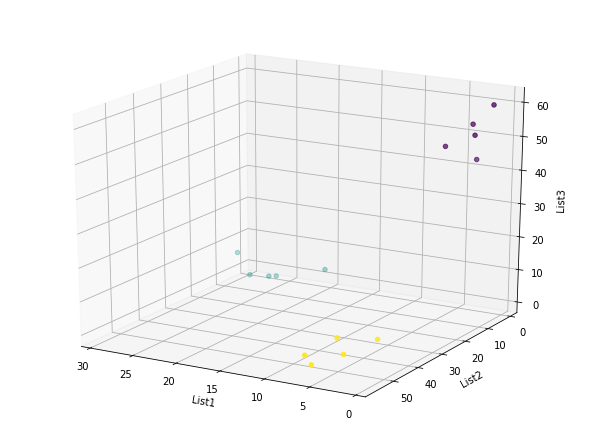

In [50]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
figure = plt.figure(1, figsize = (8,6))
ax = Axes3D(figure, rect = [0, 0, 1, 1], elev = 20, azim = 120)

ax.set_xlabel("List1")
ax.set_ylabel("List2")
ax.set_zlabel("List3")
ax.scatter(X[:,0],X[:,1],X[:,2], c = labels.astype(np.float))